In [1]:
pip install pandas statsmodels matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 22.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
# Loading the IBM dataset
# Assume you have a CSV file with data containing 'Date' and 'Close' columns
df = pd.read_csv('IBM2017.csv')

In [4]:
# Converting 'Date' column to datetime format and sorting by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

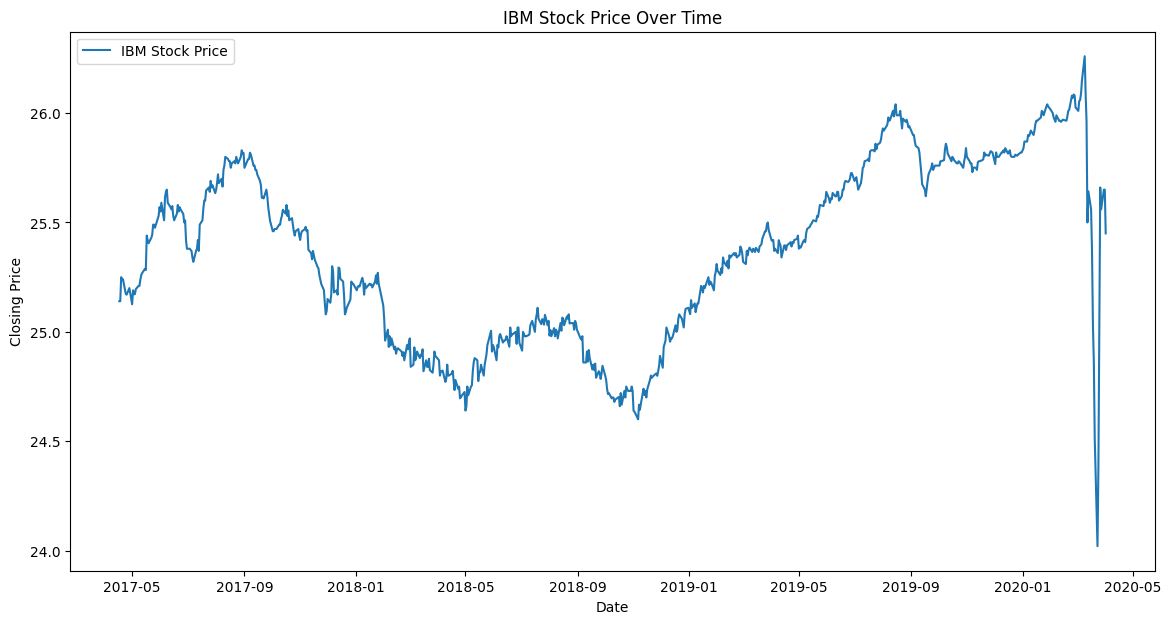

In [5]:
# Plotting the original data
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='IBM Stock Price')
plt.title('IBM Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [6]:
# Creating and fitting the Triple Exponential Smoothing model
model = ExponentialSmoothing(
    df['Close'],
    trend='add',
    seasonal='add',
    seasonal_periods=12  # Assuming monthly seasonality
)
model_fit = model.fit()

In [7]:
# Making predictions
df['Prediction'] = model_fit.fittedvalues

In [8]:
# Forecasting future stock prices
forecast = model_fit.forecast(steps=12)  # Predicting for the next 12 periods (months)
forecast_dates = pd.date_range(start=df['Date'].iloc[-1], periods=13, freq='M')[1:]

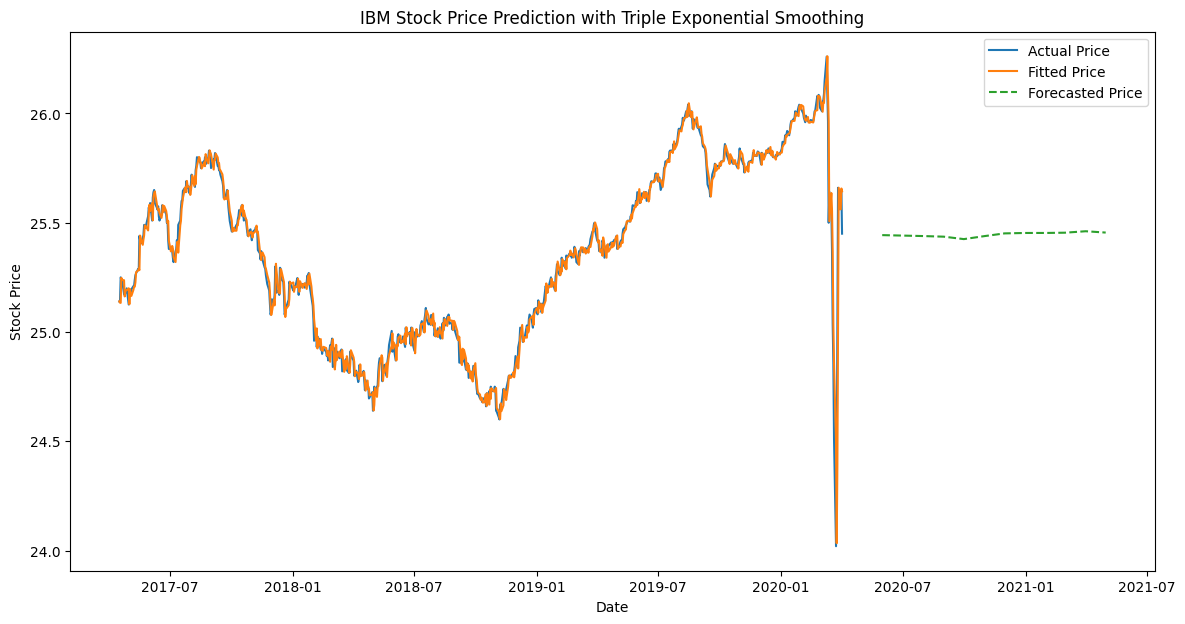

In [9]:
# Plotting the actual, fitted, and forecasted data
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(df['Date'], df['Prediction'], label='Fitted Price')
plt.plot(forecast_dates, forecast, label='Forecasted Price', linestyle='--')
plt.title('IBM Stock Price Prediction with Triple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Explanation:

    Model Fitting: The ExponentialSmoothing model is configured with an additive trend and seasonality. The seasonal_periods=12 assumes monthly seasonality, which you can adjust depending on your data.

    Predictions and Forecasting: The model fits the data and predicts the next 12 periods (months). You can adjust the steps parameter to forecast a different period.

    Visualization: The code plots the actual closing prices, the fitted values, and the forecasted future prices.

Adjustments:

    Modify seasonal_periods based on the data’s seasonality.
    Change the steps parameter to forecast for different durations.

This code should give you a good starting point for using Triple Exponential Smoothing for stock price prediction.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>